# Load Library

In [11]:
import os
from dotenv import load_dotenv

import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from urllib.parse import quote

import csv
from io import StringIO

/Users/jds/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Create DB Engine

In [12]:
load_dotenv('.env')
# create database engine
def database_connection(): 
    db_host = os.environ.get('DBHOST')
    db_port = os.environ.get('DBPORT')
    db_username = os.environ.get('DBUSER')
    db_password = os.environ.get('DBPASS')
    db_name = os.environ.get('DBNAME')
    engine_conn = create_engine('postgresql+psycopg2://{0}:{1}@{2}:{3}/{4}'.format(db_username, quote(db_password), db_host, db_port, db_name))
    #postgresql+psycopg2 untuk koneksi ke postgresql
    #mysql+pymysql untuk koneksi ke mysql
    return engine_conn

In [13]:
# test database connection
conn = database_connection().raw_connection()
df_test = pd.read_sql("select * from tb_tech_test limit 5", conn)
print('finish')

Exception during reset or similar
Traceback (most recent call last):
  File "/Users/jds/opt/anaconda3/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 757, in _finalize_fairy
    fairy._reset(pool, transaction_was_reset)
  File "/Users/jds/opt/anaconda3/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 1016, in _reset
    pool._dialect.do_rollback(self)
  File "/Users/jds/opt/anaconda3/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 683, in do_rollback
    dbapi_connection.rollback()
psycopg2.DatabaseError: SSL SYSCALL error: Operation timed out



finish


/var/folders/g0/kqn0dm690173t925jvn3s65h0000gn/T/ipykernel_78008/2094605910.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_test = pd.read_sql("select * from tb_tech_test limit 5", conn)


In [14]:
df_test

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No;;
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No;;
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes;;
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No;;


# Load Data

In [15]:
df_all = pd.read_sql("select * from tb_tech_test", conn)
df_all

/var/folders/g0/kqn0dm690173t925jvn3s65h0000gn/T/ipykernel_78008/4180084295.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all = pd.read_sql("select * from tb_tech_test", conn)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No;;
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No;;
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes;;
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes;;
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No;;
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4/2/2015,4-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No;;
2220,318775,Disney Monthly Billing for Returned Modem,6/2/2015,6-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No;;
2221,331188,complaint about Disney,6/9/2015,6-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No;;
2222,360489,Extremely unsatisfied Disney customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No;;


# Data Quality Assessment

In [16]:
# check null values
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticket #                       2224 non-null   object
 1   Customer Complaint             2106 non-null   object
 2   Date                           2106 non-null   object
 3   Date_month_year                2106 non-null   object
 4   Time                           2106 non-null   object
 5   Received Via                   2106 non-null   object
 6   City                           2106 non-null   object
 7   State                          2106 non-null   object
 8   Zip code                       2106 non-null   object
 9   Status                         2106 non-null   object
 10  Filing on Behalf of Someone;;  2106 non-null   object
dtypes: object(11)
memory usage: 191.2+ KB


In [17]:
df_all.describe()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
count,2224,2106,2106,2106,2106,2106,2106,2106,2106,2106,2106
unique,2224,1714,91,91,2076,2,899,43,1489,4,4
top,250635,Disney,24-06-15,24-Jun-15,9:50:41 PM,Customer Care Call,Atlanta,Georgia,30188,Solved,No;;
freq,1,102,204,204,2,1058,60,273,8,928,1910


In [18]:
# check unique value of "Filing on Behalf of Someone;;"" columns
df_all.iloc[:,-1].value_counts()

Filing on Behalf of Someone;;
No;;     1910
Yes;;     189
No;         6
No          1
Name: count, dtype: int64

In [19]:
df_all[df_all['Date'].isnull()]

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
38,"300824,""INTERNET , BILLING AND SERVIE ISSUES"",...",None,None,None,None,None,None,None,None,None,None
63,"356118,""Disney - failure to provide service, r...",None,None,None,None,None,None,None,None,None,None
76,"231292,""Disney data cap """"trials"""""",04-12-15,0...",None,None,None,None,None,None,None,None,None,None
99,"322511,""Disney bandwidth data caps in Atlanta,...",None,None,None,None,None,None,None,None,None,None
128,"370846,""Disney deceptive advertising, overage ...",None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2166,"358985,""Monthly bill increased, service decrea...",None,None,None,None,None,None,None,None,None,None
2194,"270923,""Xfinity corporate bullying, breach of ...",None,None,None,None,None,None,None,None,None,None
2210,"228198,""Disney customer service, and billing i...",None,None,None,None,None,None,None,None,None,None
2218,"338192,""Speed throttling, speeds not at promis...",None,None,None,None,None,None,None,None,None,None


In [20]:
df_all[df_all['Date'].isnull()]['Ticket #'][38]

'300824,"INTERNET , BILLING AND SERVIE ISSUES",21-05-15,21-May-15,9:34:19 AM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No;;'

# Data Cleansing

In [21]:
df_all_break1 = df_all[df_all['Date'].notnull()]
list_all_break2 = df_all[df_all['Date'].isnull()]['Ticket #'].tolist()
parsed_rows = list(csv.reader(list_all_break2 , quotechar='"', delimiter=',')) # parsing the joined data
df_all_break2 = pd.DataFrame(parsed_rows, columns=df_all_break1.columns)

df_all_break2

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone;;
0,300824,"INTERNET , BILLING AND SERVIE ISSUES",21-05-15,21-May-15,9:34:19 AM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No;;
1,356118,"Disney - failure to provide service, refusal t...",22-06-15,22-Jun-15,2:41:05 PM,Customer Care Call,Arlington,Virginia,22206,Solved,No;;
2,231292,"Disney data cap ""trials""",04-12-15,04-Dec-15,3:45:26 PM,Internet,Atlanta,Georgia,30316,Closed,No;;
3,322511,"Disney bandwidth data caps in Atlanta, GA",06-03-15,06-Mar-15,11:59:33 PM,Internet,Atlanta,Georgia,30341,Closed,Yes;;
4,370846,"Disney deceptive advertising, overage charges",28-06-15,28-Jun-15,12:08:05 PM,Internet,Atlanta,Georgia,30329,Pending,No;;
...,...,...,...,...,...,...,...,...,...,...,...
113,358985,"Monthly bill increased, service decreased",23-06-15,23-Jun-15,3:34:21 PM,Customer Care Call,West St Paul,Minnesota,55118,Solved,No;;
114,270923,"Xfinity corporate bullying, breach of contract",05-03-15,05-Mar-15,11:11:40 PM,Customer Care Call,Woodbridge,Virginia,22191,Closed,No;;
115,228198,"Disney customer service, and billing issues",04-10-15,04-Oct-15,10:15:03 AM,Customer Care Call,Wrightstown,New Jersey,8562,Closed,No;;
116,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes;;


In [22]:
df_all_new = pd.concat([df_all_break1, df_all_break2], ignore_index=True) # concat cleaned data
df_all_new.rename(columns={'Filing on Behalf of Someone;;':'Filing on Behalf of Someone'}, inplace=True) # change column name
df_all_new['Filing on Behalf of Someone'] = df_all_new['Filing on Behalf of Someone'].str.replace(';','') # clean punctuation
df_all_new.insert(4,"Date_new", pd.to_datetime(df_all_new['Date_month_year'], format='%d-%b-%y')) # extract the correct date format
df_all_new.insert(6,"Time_new", pd.to_datetime(df_all_new['Time'], format='%I:%M:%S %p').dt.time) # extract the correct time format
df_all_new

,Ticket #,Customer Complaint,Date,Date_month_year,Date_new,Time,Time_new,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,2015-04-22,3:53:50 PM,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,2015-08-04,10:22:56 AM,10:22:56,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,2015-04-18,9:55:47 AM,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,2015-07-05,11:59:35 AM,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,2015-05-26,1:25:26 PM,13:25:26,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,358985,"Monthly bill increased, service decreased",23-06-15,23-Jun-15,2015-06-23,3:34:21 PM,15:34:21,Customer Care Call,West St Paul,Minnesota,55118,Solved,No
2220,270923,"Xfinity corporate bullying, breach of contract",05-03-15,05-Mar-15,2015-03-05,11:11:40 PM,23:11:40,Customer Care Call,Woodbridge,Virginia,22191,Closed,No
2221,228198,"Disney customer service, and billing issues",04-10-15,04-Oct-15,2015-10-04,10:15:03 AM,10:15:03,Customer Care Call,Wrightstown,New Jersey,8562,Closed,No
2222,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,2015-12-06,6:35:59 PM,18:35:59,Customer Care Call,Yorkville,Illinois,60560,Open,Yes


In [23]:
df_all_new.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Date_new',
       'Time', 'Time_new', 'Received Via', 'City', 'State', 'Zip code',
       'Status', 'Filing on Behalf of Someone'],
      dtype='object')

In [24]:
df_all_new['Filing on Behalf of Someone'].value_counts()

Filing on Behalf of Someone
No     2021
Yes     203
Name: count, dtype: int64

In [25]:
df_all.to_csv('dump.csv') # dump the raw data
df_all_new.to_csv('dump_clean.csv') # dump the cleaned data

# Data Wrangling

In [26]:
# Combine Date & Time
df_all_new["Datetime"] = pd.to_datetime(df_all_new["Date_new"].astype(str) + " " + df_all_new["Time_new"].astype(str))

In [27]:
# Extract Day and Hour
df_all_new["Day"] = df_all_new["Datetime"].dt.day_name()  # Extract day name (Monday, Tuesday, ...)
df_all_new["Hour"] = df_all_new["Datetime"].dt.hour  # Extract hour

# Create pivot table
heatmap_data = df_all_new.pivot_table(index="Day", columns="Hour", values="Ticket #", aggfunc="count")

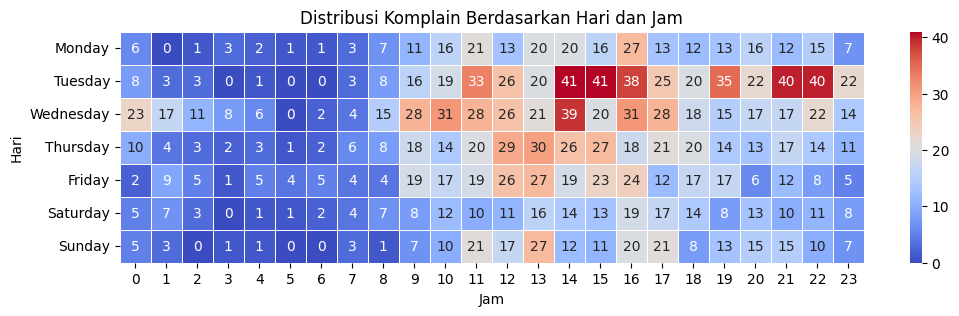

In [28]:
# Sorting day based on week sequence
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order).fillna(0)

# Plot Heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Title & Labels
plt.title("Distribusi Komplain Berdasarkan Hari dan Jam")
plt.xlabel("Jam")
plt.ylabel("Hari")

# Show Plot
plt.show()


In [29]:
# count complaints based on month
df_all_new['Date_new'].dt.month.value_counts()

Date_new
6     1046
4      375
5      317
8       67
12      65
2       59
1       55
9       55
10      53
7       49
3       45
11      38
Name: count, dtype: int64

In [30]:
# count complaints based on channel
print(df_all_new['Received Via'].value_counts())
print(df_all_new['Received Via'].value_counts(normalize=True))

Received Via
Customer Care Call    1119
Internet              1105
Name: count, dtype: int64
Received Via
Customer Care Call    0.503147
Internet              0.496853
Name: proportion, dtype: float64


In [31]:
# count complaints based on city
df_all_new['City'].value_counts().head(10)

City
Atlanta         63
Chicago         47
Knoxville       36
Houston         33
Jacksonville    31
Philadelphia    25
Denver          22
Nashville       22
Miami           22
Indianapolis    21
Name: count, dtype: int64

In [32]:
# count complaints based on state
df_all_new['State'].value_counts().head(10).index

Index(['Georgia', 'Florida', 'California', 'Illinois', 'Tennessee',
       'Pennsylvania', 'Michigan', 'Washington', 'Colorado', 'Maryland'],
      dtype='object', name='State')

In [33]:
# count complaints based on zip code
df_all_new['Zip code'].value_counts().head(20)

Zip code
30144    8
30188    8
30022    7
37122    6
30324    6
30066    6
60657    6
85718    6
37920    6
98033    5
30114    5
30316    5
8816     5
2138     5
22206    5
30315    5
37909    5
30101    5
33157    5
77493    5
Name: count, dtype: int64

In [34]:
# count complaints based on status
print(df_all_new['Status'].value_counts())
print(df_all_new['Status'].value_counts(normalize=True))

Status
Solved     973
Closed     734
Open       363
Pending    154
Name: count, dtype: int64
Status
Solved     0.437500
Closed     0.330036
Open       0.163219
Pending    0.069245
Name: proportion, dtype: float64


In [35]:
# count complaints based on Filing on Behalf of Someone column
print(df_all_new['Filing on Behalf of Someone'].value_counts())
print(df_all_new['Filing on Behalf of Someone'].value_counts(normalize=True))

Filing on Behalf of Someone
No     2021
Yes     203
Name: count, dtype: int64
Filing on Behalf of Someone
No     0.908723
Yes    0.091277
Name: proportion, dtype: float64


In [ ]:
# Filter data at peak hour (11 AM - 6 PM)
df_peak = df_all_new[(df_all_new["Hour"] >= 11) & (df_all_new["Hour"] <= 18)]

# Count total complaint based on hour and channel
channel_counts = df_peak.groupby(["Hour", "Received Via"]).size().unstack()

channel_counts

Received Via,Customer Care Call,Internet
Hour,,
11,82,70
12,73,75
13,73,88
14,82,89
15,80,71
16,90,87
17,74,63
18,52,57


<Figure size 1000x500 with 0 Axes>

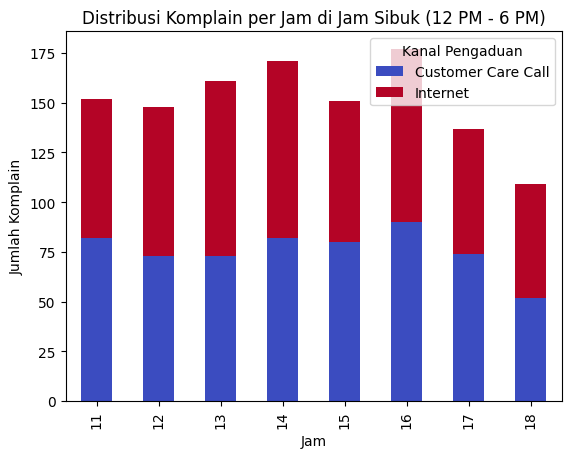

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
channel_counts.plot(kind="bar", stacked=True, colormap="coolwarm")

plt.title("Distribusi Komplain per Jam di Jam Sibuk (12 PM - 6 PM)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Komplain")
plt.legend(title="Kanal Pengaduan")
plt.show()


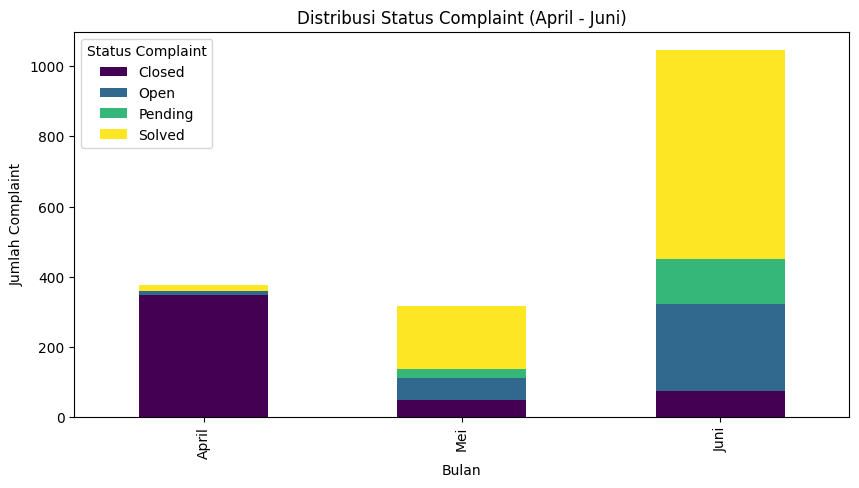

In [ ]:
df_q2 = df_all_new[df_all_new["Datetime"].dt.month.isin([4, 5, 6])]

# Group by month & status
complaints_by_month = df_q2.groupby([df_q2["Datetime"].dt.month, "Status"]).size().unstack()

# Visualize tren by month
complaints_by_month.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 5))
plt.title("Distribusi Status Complaint (April - Juni)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Complaint")
plt.xticks(ticks=[0, 1, 2], labels=["April", "Mei", "Juni"])
plt.legend(title="Status Complaint")
plt.show()


# Text exploration

In [ ]:
# text processing library
import nltk
import re
from string import punctuation
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/jds/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/jds/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
# import stopwords
import base64
import requests

url = "https://raw.githubusercontent.com/afrida-ulum/text-analysis/main/stopword.txt"
stopwords = requests.get(url).text.split('\n')

In [46]:
# function to lower case
def to_lower(text):
    return text.lower()

# function to remove white space
def remove_white_space(text):
    output = " ".join(text.split())
    return output

# remove punctuation between 2 words that dont have space
def remove_punct1(text):
    return ' '.join(re.split(',|/|-',text))

# function to remove punctuation in general
def remove_punct2(text):
    output = ''.join(c for c in text if c not in punctuation)
    return output

# function to remove number
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

# function to remove stopwords
def remove_stopwords(sentence):
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stopwords])

# Combining all text preprocessing functions
def text_preprocessing(text):
    step1 = to_lower(text)
    step2 = remove_white_space(step1)
    step3_1 = remove_punct1(step2)
    step3_2 = remove_punct2(step3_1)
    step4 = remove_numbers(step3_2)
    step5 = remove_stopwords(step4)

    return step5

In [47]:
df_all_new['Customer Complaint clean'] = df_all_new['Customer Complaint'].apply(lambda x: text_preprocessing(x))

In [48]:
df_all_new

,Ticket #,Customer Complaint,Date,Date_month_year,Date_new,Time,Time_new,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Datetime,Day,Hour,Customer Complaint clean
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,2015-04-22,3:53:50 PM,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Wednesday,15,disney cable internet speeds
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,2015-08-04,10:22:56 AM,10:22:56,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Tuesday,10,payment disappear service got disconnected
2,242732,Speed and Service,18-04-15,18-Apr-15,2015-04-18,9:55:47 AM,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Saturday,9,speed and service
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,5/7/2015,5-Jul-15,2015-07-05,11:59:35 AM,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Sunday,11,disney imposed a new usage cap of gb that puni...
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,2015-05-26,1:25:26 PM,13:25:26,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Tuesday,13,disney not working and no service to boot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,358985,"Monthly bill increased, service decreased",23-06-15,23-Jun-15,2015-06-23,3:34:21 PM,15:34:21,Customer Care Call,West St Paul,Minnesota,55118,Solved,No,2015-06-23 15:34:21,Tuesday,15,monthly bill increased service decreased
2220,270923,"Xfinity corporate bullying, breach of contract",05-03-15,05-Mar-15,2015-03-05,11:11:40 PM,23:11:40,Customer Care Call,Woodbridge,Virginia,22191,Closed,No,2015-03-05 23:11:40,Thursday,23,xfinity corporate bullying breach of contract
2221,228198,"Disney customer service, and billing issues",04-10-15,04-Oct-15,2015-10-04,10:15:03 AM,10:15:03,Customer Care Call,Wrightstown,New Jersey,8562,Closed,No,2015-10-04 10:15:03,Sunday,10,disney customer service and billing issues
2222,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,2015-12-06,6:35:59 PM,18:35:59,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,2015-12-06 18:35:59,Sunday,18,speed throttling speeds not at promised output


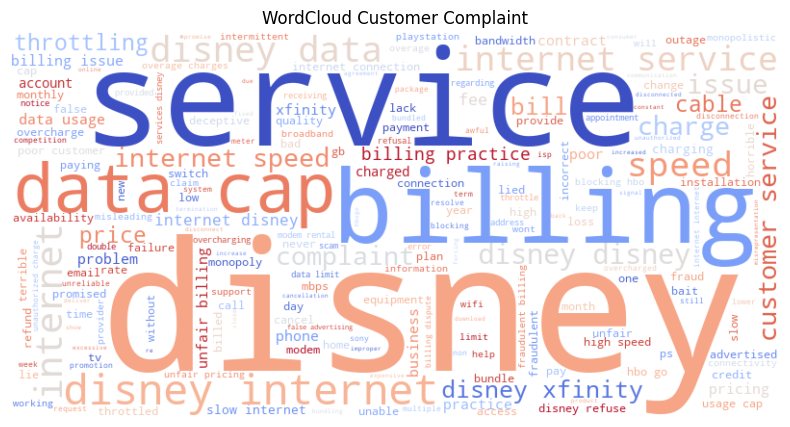

In [50]:
# Join all complaint text
all_text = " ".join(df_all_new["Customer Complaint clean"].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(all_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Customer Complaint")
plt.show()


In [63]:
from collections import Counter
# Word Frequency
word_counts = Counter(all_text.split())
common_words = word_counts.most_common(20)
common_words

[('disney', 1229),
 ('internet', 535),
 ('service', 456),
 ('billing', 294),
 ('and', 278),
 ('data', 219),
 ('to', 187),
 ('for', 180),
 ('speed', 122),
 ('of', 111),
 ('cap', 106),
 ('xfinity', 102),
 ('not', 101),
 ('customer', 93),
 ('issues', 93),
 ('my', 84),
 ('caps', 78),
 ('with', 77),
 ('practices', 74),
 ('speeds', 72)]

# Topic Modeling

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text ke vector
vectorizer = CountVectorizer(stop_words='english',max_features=1000)
X = vectorizer.fit_transform(df_all_new["Customer Complaint clean"].dropna())

# Apply LDA buat cari topic
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print Top Words per Topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: {', '.join([words[i] for i in topic.argsort()[-10:]])}")


Topic 1: monthly, fees, disneys, modem, business, deceptive, charged, speeds, pricing, throttling
Topic 2: connection, phone, speeds, cable, poor, slow, speed, service, disney, internet
Topic 3: xfinity, equipment, charge, fraudulent, monopoly, charging, unfair, practices, disney, billing
Topic 4: hbo, price, usage, xfinity, complaint, charges, caps, cap, data, disney
Topic 5: terrible, failure, bait, switch, issue, billing, customer, issues, disney, service
